# Ridge Regression Example

With hyperparameters tuned

Before tuning

In [21]:
from ucimlrepo import fetch_ucirepo
import numpy as np

air_quality = fetch_ucirepo(id=360) 

air_quality_features = air_quality.data.features
air_quality_features.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [22]:
from sklearn.model_selection import train_test_split

# CO(GT) as target
y = air_quality_features['CO(GT)']
# remove date and time and target from selected features
X = air_quality_features.drop(columns=['Date', 'Time', 'CO(GT)'])

# replace values of -200 with NA then impute
X = X.replace(-200, np.nan)
y = y.replace(-200, np.nan)
# drop rows with missing target
mask = ~y.isna()
X = X[mask]
y = y[mask]
# impute features only
X = X.fillna(X.mean())
print(f"X: {X.shape}, y: {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X.head()

X: (7674, 12), y: (7674,)


,PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [23]:
from sklearn.preprocessing import StandardScaler

# standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

alpha = 1.0
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train_scaled, y_train)

# make predictions on test set
y_pred = ridge_model.predict(X_test_scaled)

# calculate the Mean Squared Error (MSE) and R-squared (R2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R2 Score:", r2)

Mean Squared Error (MSE): 0.22744969569192808
R2 Score: 0.890800249215181


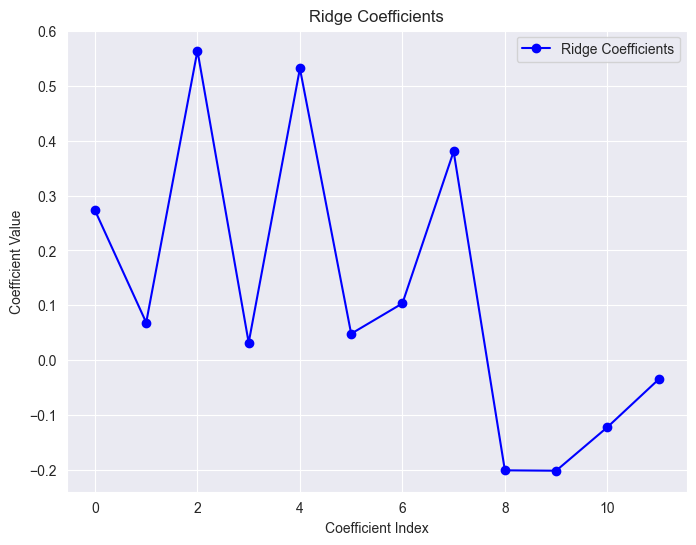

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(ridge_model.coef_, marker='o', linestyle='-', color='b', label='Ridge Coefficients')
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Value")
plt.title("Ridge Coefficients")
plt.legend()
plt.grid(True)
plt.show()

## Tune the alpha parameter

In [26]:
from sklearn.model_selection import GridSearchCV

# range of alphas to tune
alphas = [0.001, 0.01, 0.1, 1.0, 10, 100]

# create a param grid
param_grid = { 'alpha': alphas }
grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

best_alpha = grid_search.best_params_['alpha']
best_alpha

10

In [32]:
# new ridge model with tuned alpha
ridge_model = Ridge(alpha=best_alpha)
# can also use ridge_model = grid_search.best_estimator_
ridge_model.fit(X_train_scaled, y_train)

# make predictions on the test set
y_pred = ridge_model.predict(X_test_scaled)

# calculate MSE and R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R2 Score:", r2)
# print("R2 Score:", ridge_model.score(X_test_scaled, y_test))

Mean Squared Error (MSE): 0.2275683736335159
R2 Score: 0.8907432713343989


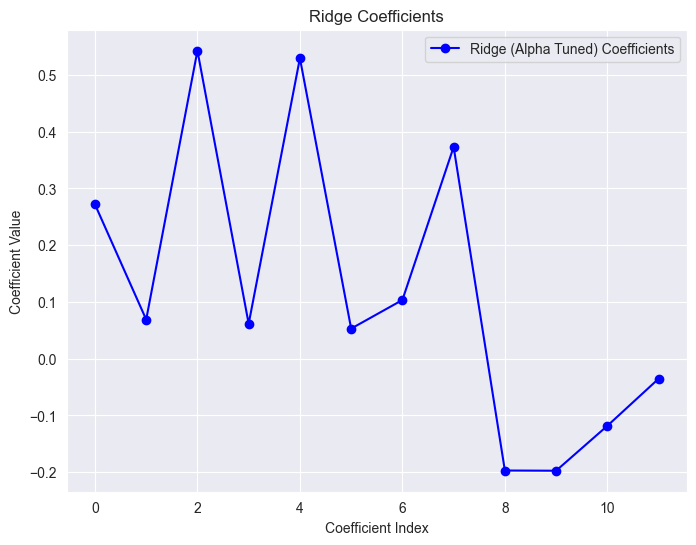

In [28]:
plt.figure(figsize=(8, 6))
plt.plot(ridge_model.coef_, marker='o', linestyle='-', color='b', label='Ridge (Alpha Tuned) Coefficients')
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Value")
plt.title("Ridge Coefficients")
plt.legend()
plt.grid(True)
plt.show()